Intro

Planned topics to cover:
* Health perception (good / not good) -> Animal phobia (pure / mixed)
* Region of origin -> Animal phobia (Y / N)
* Region of origin -> Animal phobia (pure / mixed)

In [4]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import scipy.stats

from global_vars import *
from reference import *


NESARC = r"C:\Users\USER\Documents\Courses\Coursera\dai\datasets\nesarc\nesarc_pds.csv"


# Load data
data = pd.read_csv(NESARC, low_memory=False)

# Convert necessary values to numbers
data[ANIMALS_MAP[CODE]] = pd.to_numeric(data[ANIMALS_MAP[CODE]], errors='coerce')

Create a distinction between pure and mixed animal phobia.

In [5]:
for phobia in ALL_SPECIFIC_PHOBIAS:
    data[phobia[CODE] + '_NEW'] = data[phobia[CODE]].replace([2, 9], 0)
sp_new_list = [entry[CODE] + '_NEW' for entry in ALL_SPECIFIC_PHOBIAS]  # creating a list of names for the new columns
data[APPUREMIXED] = data.loc[:, sp_new_list].sum(axis=1)
condition_for_replace = data[APPUREMIXED] > 1
data.loc[condition_for_replace, APPUREMIXED] = 0  # replace values > 1 with 0
appuremixed_freq = data[data[ANIMALS_MAP[CODE]] == 1][APPUREMIXED].value_counts(sort=False, dropna=False)
appuremixed_percent = data[data[ANIMALS_MAP[CODE]] == 1][APPUREMIXED].value_counts(sort=False, dropna=False, normalize=True)

print('Frequencies, percentages for pure and mixed animal phobia')
print(pd.concat(dict(Frequencies=appuremixed_freq.rename({1: 'Pure', 0: 'Mixed'}),
                     Percentages=appuremixed_percent.rename({1: 'Pure', 0: 'Mixed'})), axis=1))

Frequencies, percentages for pure and mixed animal phobia
       Frequencies  Percentages
Mixed         6836     0.751787
Pure          2257     0.248213


Create subsed for only those with animal phobia.

In [13]:
condition_ap = data[ANIMALS_MAP[CODE]] == 1
subset_ap = data[condition_ap].copy()  # Make a subset of those with animal phobia

Create binary health perception variable

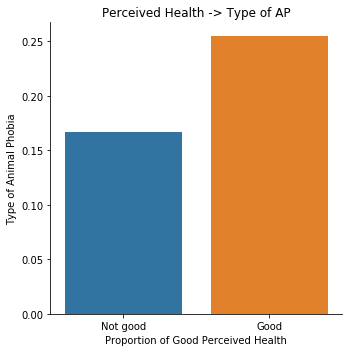

In [14]:
def sort_health(row):
    '''
    Recoding values for perceived health
    :param row: row of a dataset
    :return: code value (int)
    '''
    good = [1, 2, 3, 4]
    if row[HEALTH_MAP[CODE]] in good:
        return 1
    else:
        return 0
    
subset_ap['HEALTHBINARY'] = subset_ap.apply(lambda row: sort_health(row), axis=1)

subset_ap['HEALTHBINARY'] = subset_ap['HEALTHBINARY'].astype('category')
subset_ap['HEALTHBINARY'] = subset_ap['HEALTHBINARY'].cat.rename_categories(['Not good', 'Good'])

seaborn.catplot(x='HEALTHBINARY', y=APPUREMIXED, kind='bar', ci=None, data=subset_ap)
plt.xlabel('Proportion of Good Perceived Health')
plt.ylabel('Type of Animal Phobia')

plt.title('Perceived Health -> Type of AP')
# plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

NEXT: Use Chi Square Test to establish if the difference in health perception between pure and mixed AP groups is significant.

Sort origins by regions and see if there is significant difference in pure AP rate among regions.